# Load one of the problems

Code used load one of the problems:

In [12]:
%matplotlib inline
import pycutestmgr as cute
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix, linalg, csr_matrix
from ipsolver import eqp_kktfact, projections, projected_cg, orthogonality
from numpy.testing import (TestCase, assert_array_almost_equal,
                           assert_array_equal, assert_array_less,
                           assert_raises, assert_equal, assert_,
                           run_module_suite, assert_allclose, assert_warns,
                           dec)
import cProfile
cute.clearCache('HS71')
name = "CVXQP3_M"

cute.prepareProblem(name)
problem=cute.importProblem(name)
info = problem.getinfo()
x0 = info["x"]
G = problem.ihess(x0)
f, c = problem.obj(x0, True) 
b, A = problem.cons(x0, True)

G = csc_matrix(G)
A = csc_matrix(A)


# Check if the Projection Matrix is ok

Check if the projection matrix Z, Y, LS perform the expected operations

In [2]:
A_dense = A.toarray()

# Get Projections
Z, LS, Y = projections(A, method='NormalEquation')

z = np.random.normal(size=np.shape(x0))

# Test if x is in the null_space
x = Z.matvec(z)
print orthogonality(A, x)

# Test if x is the least square solution
x = LS.matvec(z)
x2 = np.linalg.lstsq(A_dense.T, z)[0]

print np.linalg.norm(x - x2)

z = np.random.normal(size=np.shape(b))

# Test if x is in the null_space
x = Y.matvec(z)
print np.linalg.norm(A.dot(x)-z)

# Test if x is in the row space of A
A_ext = np.vstack((A_dense, x))
print np.linalg.matrix_rank(A_dense)-np.linalg.matrix_rank(A_ext)

2.39899713441e-16
7.81198691263e-07
6.9558395573e-10


In [13]:
Z, _, Y = projections(A, method='AugmentedSystem')

In [17]:
x_as, _,  info_as = projected_cg(G, c, Z, Y, b, tol=1e-20, return_all=True)

In [18]:
niter = len(info_as["allvecs"])
constr_violation = np.zeros(len(info_as["allvecs"]))
optimality = np.zeros(len(info_as["allvecs"]))
k = 0
for xa in info_as["allvecs"]:
    optimality[k] = 1.0/2.0*G.dot(xa).dot(xa)+c.dot(xa) + f
    constr_violation[k] = np.linalg.norm(A*xa-b)
    k += 1

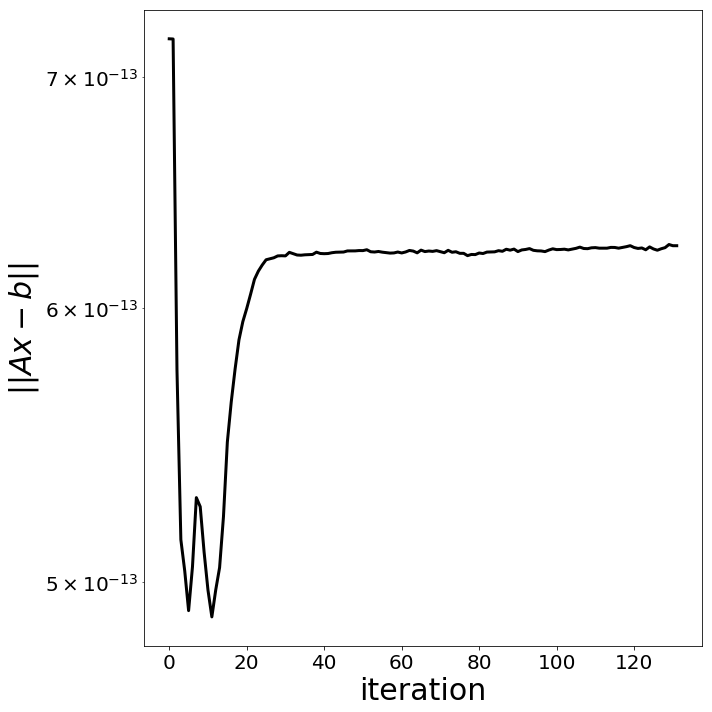

In [19]:
plt.figure(figsize=(10, 10))
plt.semilogy(range(niter), constr_violation, color='black', lw=3)
plt.xlabel("iteration", fontsize=30)
plt.ylabel(r"$\||A x-b\||$", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=20)
plt.tight_layout()
# plt.savefig("error_per_iteration_corrected.png")

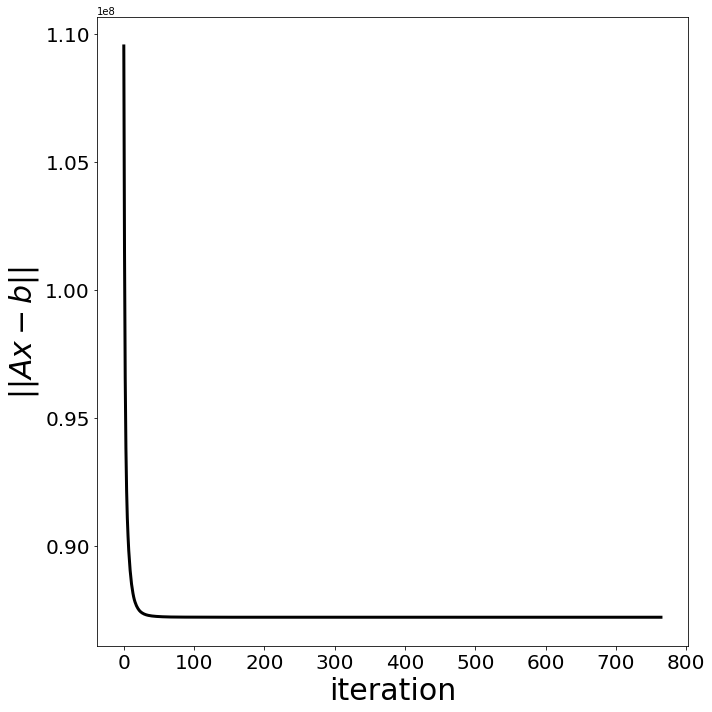

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(range(niter), optimality, color='black', lw=3)
plt.xlabel("iteration", fontsize=30)
plt.ylabel(r"$\||A x-b\||$", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
#plt.savefig("error_per_iteration_corrected.png")

In [8]:
x, lambd = eqp_kktfact(G, c, A, b)

In [9]:
optimality = 1.0/2.0*G.dot(x).dot(x)+c.dot(x) + f

optimality

array([ 87211835.9611873])

In [10]:
np.linalg.norm(x)

894.08061759817656

In [11]:
optimality = 1.0/2.0*G.dot(x_as).dot(x_as)+c.dot(x_as) + f

optimality

array([ 87211835.96119119])